<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preface" data-toc-modified-id="Preface-1">Preface</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Sampling" data-toc-modified-id="Sampling-3">Sampling</a></span></li><li><span><a href="#Convolution" data-toc-modified-id="Convolution-4">Convolution</a></span></li><li><span><a href="#Periodic-signals" data-toc-modified-id="Periodic-signals-5">Periodic signals</a></span></li><li><span><a href="#Fourier-series" data-toc-modified-id="Fourier-series-6">Fourier series</a></span></li><li><span><a href="#Fourier-transform" data-toc-modified-id="Fourier-transform-7">Fourier transform</a></span><ul class="toc-item"><li><span><a href="#Continuous-Fourier-transform" data-toc-modified-id="Continuous-Fourier-transform-7.1">Continuous Fourier transform</a></span></li><li><span><a href="#Discrete-Time-Fourier-transform-(DTFT)" data-toc-modified-id="Discrete-Time-Fourier-transform-(DTFT)-7.2">Discrete-Time Fourier transform (DTFT)</a></span></li><li><span><a href="#Discrete-Fourier-transform-(DFT)" data-toc-modified-id="Discrete-Fourier-transform-(DFT)-7.3">Discrete Fourier transform (DFT)</a></span></li></ul></li><li><span><a href="#Convolution-theorem" data-toc-modified-id="Convolution-theorem-8">Convolution theorem</a></span></li><li><span><a href="#Nyquist-Shannon-sampling-theorem" data-toc-modified-id="Nyquist-Shannon-sampling-theorem-9">Nyquist-Shannon sampling theorem</a></span></li><li><span><a href="#Short-time-Fourier-transform" data-toc-modified-id="Short-time-Fourier-transform-10">Short-time Fourier transform</a></span></li><li><span><a href="#Filters" data-toc-modified-id="Filters-11">Filters</a></span><ul class="toc-item"><li><span><a href="#Impulse-response" data-toc-modified-id="Impulse-response-11.1">Impulse response</a></span></li><li><span><a href="#Difference-equation" data-toc-modified-id="Difference-equation-11.2">Difference equation</a></span></li><li><span><a href="#Finite-impulse-response-(FIR)-filter" data-toc-modified-id="Finite-impulse-response-(FIR)-filter-11.3">Finite impulse response (FIR) filter</a></span></li><li><span><a href="#Infinite-impulse-response-(IIR)-filter" data-toc-modified-id="Infinite-impulse-response-(IIR)-filter-11.4">Infinite impulse response (IIR) filter</a></span></li><li><span><a href="#Filter-frequency-response" data-toc-modified-id="Filter-frequency-response-11.5">Filter frequency response</a></span></li></ul></li><li><span><a href="#Postface" data-toc-modified-id="Postface-12">Postface</a></span></li><li><span><a href="#References" data-toc-modified-id="References-13">References</a></span></li></ul></div>

# Preface

This notebook introduces fundamental digital signal processing (DSP) concepts used in the 02471 Machine Learning for Signal Processing course at the Technical University of Denmark. It is targeted to students who are not familiar with signal processing and need a resource to catch up.

This notebook is far from being as complete as the official course prerequisites. Students are invited to read the course prerequisites or other well established resources for more details.

If you are reading this from the README.md, it is recommended to switch to the [IPython notebook](https://nbviewer.jupyter.org/github/philgzl/dsp-primer/blob/master/notebook.ipynb), where the math formulas are better rendered. You can also clone the notebook to modify and run the code snippets. If you prefer MATLAB you can also check the [transcript.m](https://github.com/philgzl/dsp-primer/blob/master/transcript.m) file where all the code snippets were translated to MATLAB.

The following assumes you are familiar with real analysis mathematics.

# Introduction

A signal usually refers to a time varying function or variable. Signals can be discrete (e.g. characters in a sentence) or continuous (e.g. pressure, voltage) by nature. In the real world, signals are usually captured by sensors (e.g. a microphone captures pressure variations and converts them to an electrical signal).

A digital signal is a discrete representation of a signal. If the signal is continuous by nature, the digital signal has been derived by sampling and quantization. Digital signal processing (DSP) is the analysis and processing of digital signals.

![analog_discrete_digital](pics/analog_discrete_digital.png)

Sampling and quantization is performed by a analog-to-digital converter (ADC). The digital signal can then be processed by DSP processors. If needed, it can be converted back to a continuous signal by a digital-to-analog converter (DAC). ADCs and DACs are embedded in a wide range of devices.

E.g. the electrical signal produced by the microphone on a laptop is fed to a built-in ADC, and this signal can then be compressed by a DSP processor to be sent over the Internet. Conversely, a DAC converts the digital sound signals to continuous electrical signals so they can be emitted by the laptop speakers.

A typical signal processing chain is depicted below.

![dsp_chain](pics/dsp_chain.png)

# Sampling

The sampling of a continuous signal can be described as follows. Let $x(t)$ a continuous signal,

$$
\begin{aligned}
x \colon \mathbb{R} &\longrightarrow \mathbb{R} \\
t &\longmapsto x(t).
\end{aligned}
$$

A digital representation of $x(t)$ denoted as $x[n]$ can be defined as follows,

$$ x[n] = x(nT_s) , \quad \forall n \in \mathbb{Z}, $$

where $T_s$ is the **sampling period**. The smaller $T_s$, the more accurate the digital representation of the signal. The sampling operation is more commonly characterized by the **sampling frequency** (or sampling rate) $f_s$,

$$ f_s = \frac{1}{T_s}.$$

**Example**: Common audio sampling frequencies are 8 kHz (telecommunications), 44.1 kHz (music CDs) and 48 kHz (movie tracks).

**Note**: In signal processing, notations like $x(t)$ are widely used to refer to a continuous signal or function, without introducing $t$. In other words, $x(t)$ does not refer to the value taken by $x$ at $t$, but refers to the function $x$ of the dependent variable $t$. Similarly, $x[n]$ refers to the function $x$ of the discrete variable $n$. The usage of brackets is widely used to distinguish between discrete signals and analog signals.

**Note**: The signals above were introduced as taking values in $\mathbb{R}$ but they can also take values in $\mathbb{C}$.

The sampling of a continuous signal can be seen as the product of the original signal with a **Dirac comb**. The Dirac comb with period $T_s$ is defined as

$$
\begin{aligned}
\text{III}_{T_s} \colon \mathbb{R} &\longrightarrow \mathbb{R} \\
t &\longmapsto \sum_{k=-\infty}^{+\infty}\delta(t-kT_s),
\end{aligned}
$$

where $\delta$ is the Dirac delta function. In other words, $\text{III}_{T_s}$ is the function that equals zero everywhere except on points evenly spaced by $T_s$.

![comb](pics/comb.png)

Sampling $x(t)$ can be seen as multiplying $x(t)$ with $\text{III}_{T_s}$,

$$
\forall t \in \mathbb{R}, \quad (\text{III}_{T_s} x)(t) = \left\{
\begin{aligned}
&x(n{T_s}) &&\text{if}\ \exists n \in \mathbb{Z}\ \text{such that}\ t=n{T_s},\\
&0 &&\text{else}.
\end{aligned}\right.
$$

This will be useful in the following.

# Convolution

The convolution is a mathematical operation between two functions and outputs a new function. The convolution operator is denoted as $*$ and it is well defined for integrable functions in $L^1(\mathbb{R})$,

$$
\begin{aligned}
* \colon L^1(\mathbb{R}) \times L^1(\mathbb{R}) &\longrightarrow L^1(\mathbb{R}) \\
f, g &\longmapsto f * g
\end{aligned}
$$

It is defined as

$$ \forall \tau \in \mathbb{R}, \quad (f * g)(\tau) = \int_{-\infty}^{+\infty}f(t)g(\tau-t)dt. $$

The convolution is commutative: $f * g = g * f$.

The **discrete convolution** is the adaptation to discrete signals and is defined as

$$ \forall m \in \mathbb{Z}, \quad (f * g)[m] = \sum_{n=-\infty}^{+\infty}f[n]g[m-n]. $$

For discrete signals with finite lengths, signal values outside the definition range are assumed to be 0, and the sum becomes finite as most of the terms equal zero. E.g. if $x[n]$ with length $N_x$ is defined for $n \in \{0, 1, ..., N_x-1\}$, and $y[n]$ with length $N_y$ is defined for $n \in \{0, 1, ..., N_y-1\}$, then $(x * y)[m]$ has length $N_x+N_y-1$ and is defined for  $m \in \{0, 1, ..., N_x+N_y-1\}$.

The convolution can be seen as a time-inversion of one of the signals, followed by a "delay-and-product-sum" operation; for each delay value $\tau$ or $m$, one signal is delayed with respect to the other before integrating the product of the signals. In the animation below, the convolution result $f*g$ in black is obtained by integrating the green area at each time step.

![convolution](pics/convolution.gif)

**Example**: The identity element for the convolution is the Dirac delta impulse,

$$x[n] * \delta[n] = x[n]. $$

You can prove it as an exercise.

**Example**: The L-point moving average of a time series can be expressed as a convolution. Consider $x[n]$ a time series and $y[n]$ its L-point moving average,

$$ 
\begin{aligned}
y[n] &= \frac{1}{L}(x[n] + x[n-1] +\ ...\ + x[n-L+1])\\
&= \frac{1}{L}\sum_{k=0}^{L-1}x[n-k]\\
&= \sum_{k=0}^{L-1}h[k]x[n-k] \quad \quad \text{where}\ h[k]=\frac{1}{L}\\
&= h[n]*x[n],
\end{aligned}
$$

where $h[n]=\underbrace{[\frac{1}{L}, \frac{1}{L},\ ...\ , \frac{1}{L}]}_\text{L terms}$.

Below I use `numpy.convolve` to convolve an arbitrary signal with $h[n]=[\frac{1}{L}, \frac{1}{L},\ ...\ , \frac{1}{L}]$.

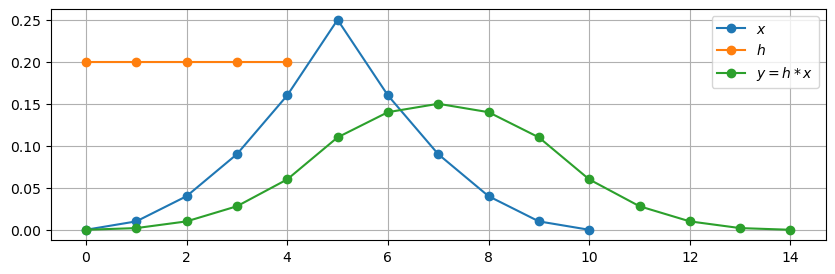

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.grid'] = True

n = 11  # number of points
x = np.linspace(0, 1, n) ** 2 ; x = np.minimum(x, x[::-1])  # arbitrary signal
L = 5  # number of points to average
h = np.ones(L) / L
y = np.convolve(h, x)

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(x, 'o-', label='$x$')
ax.plot(h, 'o-', label='$h$')
ax.plot(y, 'o-', label='$y=h*x$')
ax.legend()
plt.show()

# Periodic signals

Let $x(t)$ a periodic signal. Therefore, there exists a period $T\in\mathbb{R}$ such that

$$ x(t+T) = x(t), \quad \forall t \in \mathbb{R}. $$

A periodic signal can also be characterized by its frequency $f$,

$$ f = \frac{1}{T}. $$

Examples of periodic signals:
* Sinusoids: $ x(t) = \sin(2 \pi f t), \forall t \in \mathbb{R} $
* Complex exponentials: $ x(t) = e^{i 2 \pi f t}, \forall t \in \mathbb{R} $
* Temperature across years (disregarding rising trend due to global warming)

# Fourier series

Any continuous periodic signal can be written as a discrete sum of complex exponentials called Fourier series.

Let $x(t)$ be a periodic signal with period $T$. Therefore, there exists a sequence $c_n$ in $\mathbb{C}$ such that

$$ x(t) = \sum_{n=-\infty}^{+\infty} c_n e^{i 2 \pi \frac{n t}{T}}, \quad \forall t \in \mathbb{R}. $$

The $c_n$ are called the **Fourier coefficients**.

If $x(t)$ is real-valued, then for all $n \in \mathbb{Z}$, $c_n$ and $c_{-n}$ are complex conjugates and the sum can be rearranged as a sum of sines and cosines,

$$ x(t) = \frac{a_0}{2} + \sum_{n=1}^{+\infty} a_n \cos (2 \pi \frac{n t}{T}) + \sum_{n=1}^{+\infty} b_n \sin (2 \pi \frac{n t}{T}) , \quad \forall t \in \mathbb{R}. $$

This means that we can think of any periodic signal as a sum of well-known functions, the complex exponentials, which form a basis of functions in the $L^2$ sense. As a consequence, the $c_n$ can be derived by projecting $x(t)$ onto the basis functions,

$$ c_n = \frac{1}{T}\int_T x(t) e^{-i 2 \pi \frac{n t}{T}} dt, \quad \forall n \in \mathbb{Z}.$$

The Fourier series are a primary motivation of the **Fourier transform** (see further below).

**Example**: Let $x(t)$ a sine function with frequency $f$,

$$ x(t) = \sin(2 \pi f t), \quad \forall t \in \mathbb{R}.$$

Euler's formula allows to rewrite $x(t)$ as

$$ x(t) = -\frac{i}{2}e^{i 2 \pi f t} + \frac{i}{2}e^{-i 2 \pi f t}, \quad \forall t \in \mathbb{R}.$$

Here the Fourier coefficients can be directly identified. We have
* $c_1 = -\frac{i}{2}$,
* $c_{-1} = \frac{i}{2}$,
* $c_n = 0$ if $n \notin \{-1, 1\}$.

**Example**: Let $x(t)$ a sawtooth wave with period $2 \pi$,

$$ x(t) = (\frac{t}{\pi} + 1)\ \text{mod}\ 2 - 1, \quad \forall t \in \mathbb{R}.$$

It can be shown that $x(t)$ can be rewritten as an infinite sum of sines,

$$ x(t) = -\frac{2}{\pi}\sum_{k=1}^{+\infty}\frac{(-1)^k}{k}\sin kt.$$

The Fourier coefficients here are

* $c_k = \frac{i}{\pi}\frac{(-1)^k}{k}$ if $k>0$,

* $c_k = -\frac{i}{\pi}\frac{(-1)^k}{k}$ if $k<0$,

* $c_0 = 0$ if $k=0$.

Or using $a_n$ and $b_n$ coefficients,

* $b_k = -\frac{2}{\pi}\frac{(-1)^k}{k}$ for all $k>0$,

* $a_k = 0$ for all $k\geq 0$.

In the snippet below I verify this by adding a finite amount of these sines. The more sines are added, the more the total sum resembles a sawtooth wave.

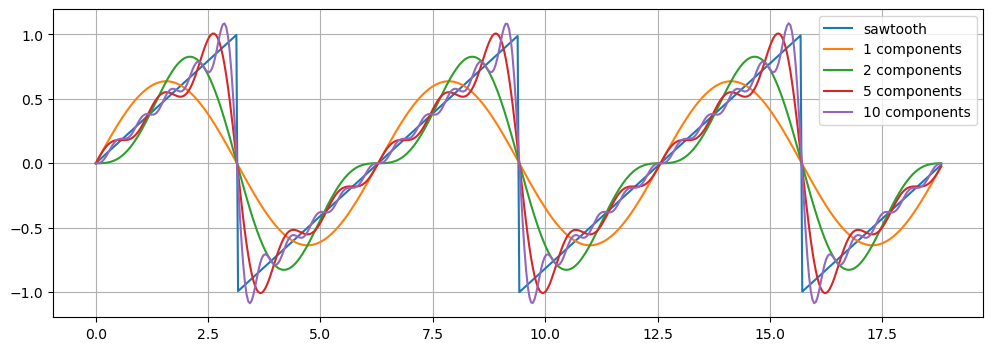

In [2]:
n = 500  # number of points
n_T = 3  # number of periods

t = np.arange(n) / n * n_T * 2 * np.pi
x = (t / np.pi + 1) % 2 - 1

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(t, x, label='sawtooth')

for n_components in [1, 2, 5, 10]:
    x = 0
    for k in range(1, n_components + 1):
        x += -2 / np.pi * (-1) ** k / k * np.sin(k * t)
    ax.plot(t, x, label=f'{k} components')

ax.legend()
plt.show()  # you should see the more sines we add, the closer the total sum resembles a sawtooth wave

# Fourier transform

## Continuous Fourier transform

The Fourier transform is a mathematical operation that decomposes time-domain functions into frequency-domain functions. The term *Fourier transform* can refer to both the frequency-domain representation of a signal and the mathematical operation itself.

The Fourier transform is first formally defined for continuous signals (not necessarily periodic) and outputs a new continuous function depending on frequency. It is commonly denoted as $\mathcal{F}$ and is defined as

$$
\begin{aligned}
\mathcal{F} \colon L^1(\mathbb{R}) &\longrightarrow L^1(\mathbb{R}) \\
f &\longmapsto
\begin{aligned}[t]
    \mathcal{F}(x) \colon \mathbb{R} &\longrightarrow \mathbb{C} \\
    \omega &\longmapsto \int_{-\infty}^{+\infty}x(t)e^{-i\omega t}dt.
\end{aligned}
\end{aligned}
$$

In other words, given $x$ a continuous function depending on time,

$$ \mathcal{F}(x)(\omega) = \int_{-\infty}^{+\infty}f(t)e^{-i\omega t}dt, \quad \forall \omega \in \mathbb{R}. $$

This can be seen as the projection of $x$ onto the basis of complex exponentials.

Notes and properties:
* The Fourier transform of $x$ is a function of $\omega$ which is a frequency variable in radian per second (rad/s). Sometimes, a frequency variable in Hertz and denoted as $f$ is used instead, in which case $\omega=2\pi f$ and the integral is changed accordingly.
* The Fourier transform takes **complex** values
* The Fourier transform is **linear**: $\mathcal{F}(\alpha x + \beta y)=\alpha\mathcal{F}(x)+\beta\mathcal{F}(y)$
* It is common to denote the Fourier transform of $x$ with an uppercase as follows: $\mathcal{F}(x)=X$.
    * Sometimes it is denoted as follows to emphasize on the dependent variables: $\mathcal{F}[x(t)] = X(\omega)$
* The inverse Fourier transform of $X$ is $$ \mathcal{F}^{-1}(X)(t) = \frac{1}{2\pi}\int_{-\infty}^{+\infty}X(\omega)e^{i\omega t}d\omega, \quad \forall t \in \mathbb{R}, $$ which is the same as the forward Fourier transform except there is a normalization factor and a plus sign in the exponential.

## Discrete-Time Fourier transform (DTFT)

Let $x[n]$ a discrete signal with infinite length (not necessarily periodic). The discrete-time Fourier transform (DTFT) of $x[n]$ is defined as

$$ X(\omega) = \sum_{n=-\infty}^{+\infty}x[n]e^{-i\omega n}, \quad \forall \omega \in \mathbb{R}.$$

Once again this resembles a projection on the basis of complex exponentials, except it is adapted for a discrete signal by replacing the integration sign with a discrete sum over the signal values.

The DTFT is $2\pi$ periodic. The inverse DTFT is

$$ x[n] = \frac{1}{2\pi}\int_{2\pi}X(\omega)e^{i\omega n}d\omega, \quad \forall n \in \mathbb{Z}.$$

This is a first adaptation for discrete signals, except the summation is infinite and it still takes values in an infinite and continuous frequency space. The next step is to *truncate* and *sample* the DTFT at evenly spaced frequency points, to obtain discrete Fourier transform (DFT).

## Discrete Fourier transform (DFT)

Let $x[n]$ a discrete signal of finite length $N$. That is, we have a sequence of $N$ values $x[0], x[1], ..., x[N-1]$. The DFT of $x[n]$ is defined as

$$ X[k] = \sum_{n=0}^{N-1}x[n]e^{-i 2 \pi \frac{kn}{N}}, \quad \forall k \in \{0, 1, ..., N-1\}.$$

The inverse DFT is

$$ x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{i 2 \pi \frac{kn}{N}}, \quad \forall n \in \{0, 1, ..., N-1\}.$$

The DFT takes as input a discrete and finite amount of values and outputs a discrete and finite amount of values, so it can be evaluated in computers, unlike the DTFT.

Below is an overview of the different transforms. For a more complete explanation of the steps between Fourier transform, DTFT and DFT, you can refer to [Proakis and Manolakis](#References), Chapters 4 and 7.

![transforms](pics/transforms.png)

The DFT **decomposes signals into frequencies**. The frequency components are best observed by plotting the modulus (sometimes squared) of the Fourier transform. The modulus of the Fourier transform is often referred to as **magnitude spectrum**, and the analysis of signals using the Fourier transform as **spectral analysis**. The phase information is more difficult to interpret and can be disregarded for course 02471.

The DFT is implemented in `numpy` under `numpy.fft.fft`. FFT stands for Fast Fourier Transform and is an efficient algorithm to calculate the DFT. The terms FFT and DFT are often used interchangeably.

**Example**: Let's create a signal consisting of a sum of 2 sinusoids with different frequencies and calculate its DFT. You should see how the DFT is able to resolve the 2 components.

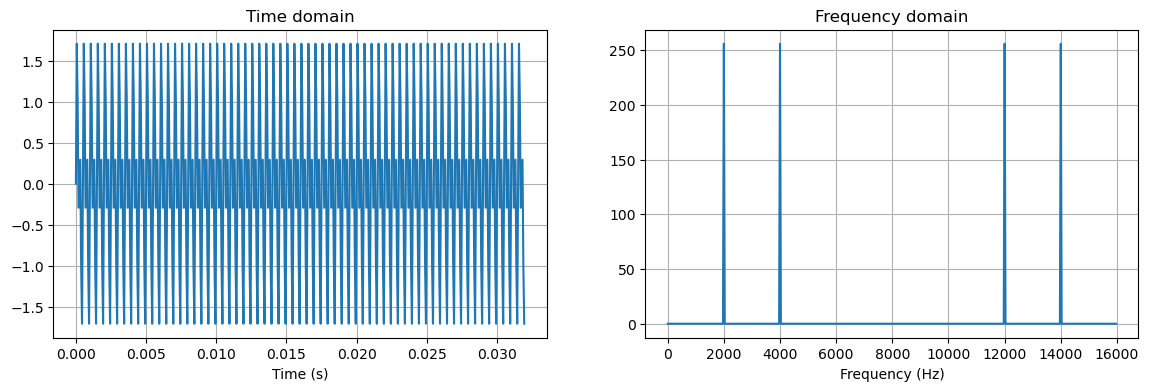

In [3]:
n = 512  # number of points
fs = 16e3  # sampling frequency

f1 = 2000  # frequency of the first component
f2 = 4000  # frequency of the second component

t = np.arange(n) / fs  # time axis
x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)  # time-domain signal
X = np.fft.fft(x)  # DFT
f = np.arange(n) / n * fs  # frequency axis; see details further below

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(t, x)
axes[0].set_title('Time domain')
axes[0].set_xlabel('Time (s)')
axes[1].plot(f, np.abs(X))  # we plot the magnitude as X is complex
axes[1].set_title('Frequency domain')
axes[1].set_xlabel('Frequency (Hz)')

plt.show()  # you should see two clean spikes at locations corresponding to f1 and f2
# you should also see two extra spikes at fs-f1 and fs-f2; see details further below

A few practical notes:
* The DFT output is **two-sided**. Half of its values correspond to *negative* frequencies. This makes sense for complex-valued signals, but for real-valued signals, values at opposite frequencies are conjugates and the information is thus redundant. It is common to **crop half of the FFT output**. For more details, you can also check the documentation for `numpy.fft.rfft`, which outputs a one-sided signal.
* Building the frequency vector axis for the output can be confusing. You should keep in mind that **the resolution in the frequency domain is $\frac{f_s}{N}$**, where $f_s$ is the sampling frequency and $N$ is the number of points.
    * This means that increasing $f_s$ gives a worse resolution in the frequency domain. Conversely a finer resolution in the time domain means a coarser resolution in the frequency domain. This is the **time-frequency duality**.
    * The frequency values corresponding to the raw FFT output are ordered as follows:
        * if N is even:

        $$ 0,\ \frac{f_s}{N},\ ...,\ \frac{N}{2}\frac{f_s}{N},\ (-\frac{N}{2}+1)\frac{f_s}{N},\ ...,\ -\frac{f_s}{N}$$

        * if N is odd:

        $$ 0,\ \frac{f_s}{N},\ ...,\ \frac{N-1}{2}\frac{f_s}{N},\ -\frac{N-1}{2}\frac{f_s}{N},\ ...,\ -\frac{f_s}{N}$$

      We first have the positive frequencies in increasing order up to $f_s$, and then the negative frequencies increasing from $-\frac{f_s}{2}$ to 0. These frequency values are commonly called **frequency bins**, as if the energy is falling in *bins* centered at those frequencies.

FAQ:
* *But in the figure above you drew the positive frequencies above $\frac{f_s}{2}$?*
    * Yes, the frequencies above $\frac{f_s}{2}$ correspond to the negative frequencies. I didn't remove them to show how the raw FFT output looks like. Normally one would discard them using `numpy.fft.rfft`. If you want to plot the entire spectrum including negative frequencies, then you would usually flip the two halves and rename the frequency axis to range from -$\frac{f_s}{2}$ to $\frac{f_s}{2}$. This can be done using `numpy.fft.fftshift`.
* *What about the frequencies above $\frac{f_s}{2}$ present in the signal?*
    * If the sampling frequency is $f_s$, then the maximum representable frequency in the digital signal is $\frac{f_s}{2}$. In other words, if a continuous signal is sampled at a sampling frequency $f_s$, then all the information at frequencies above $\frac{f_s}{2}$ is lost. This is the **Nyquist-Shannon sampling theorem** (see further below).
* *Considering if $N$ is even or odd is tedious... How can I easily and consistently build the frequency vector axis correctly?*
    * You can use `numpy.fft.fftfreq` or `numpy.fft.rfftfreq`. You can also do it manually as follows:
        * Remember the resolution is always $\frac{f_s}{N}$ and build the entire frequency vector of length $N$ including the frequencies above $\frac{f_s}{2}$: `f = np.arange(n) / n * fs`
        * Find the frequencies above $\frac{f_s}{2}$: `mask = f > fs/2`
            * For a one-sided spectrum, discard them: `f = f[~mask]`
            * For a two-sided spectrum, subtract $f_s$ to them: `f[mask] -= fs`

      This will consistently give a correct frequency axis regardless of $N$ being even or odd.

**More examples**: Below I plot a series of common Fourier transforms.

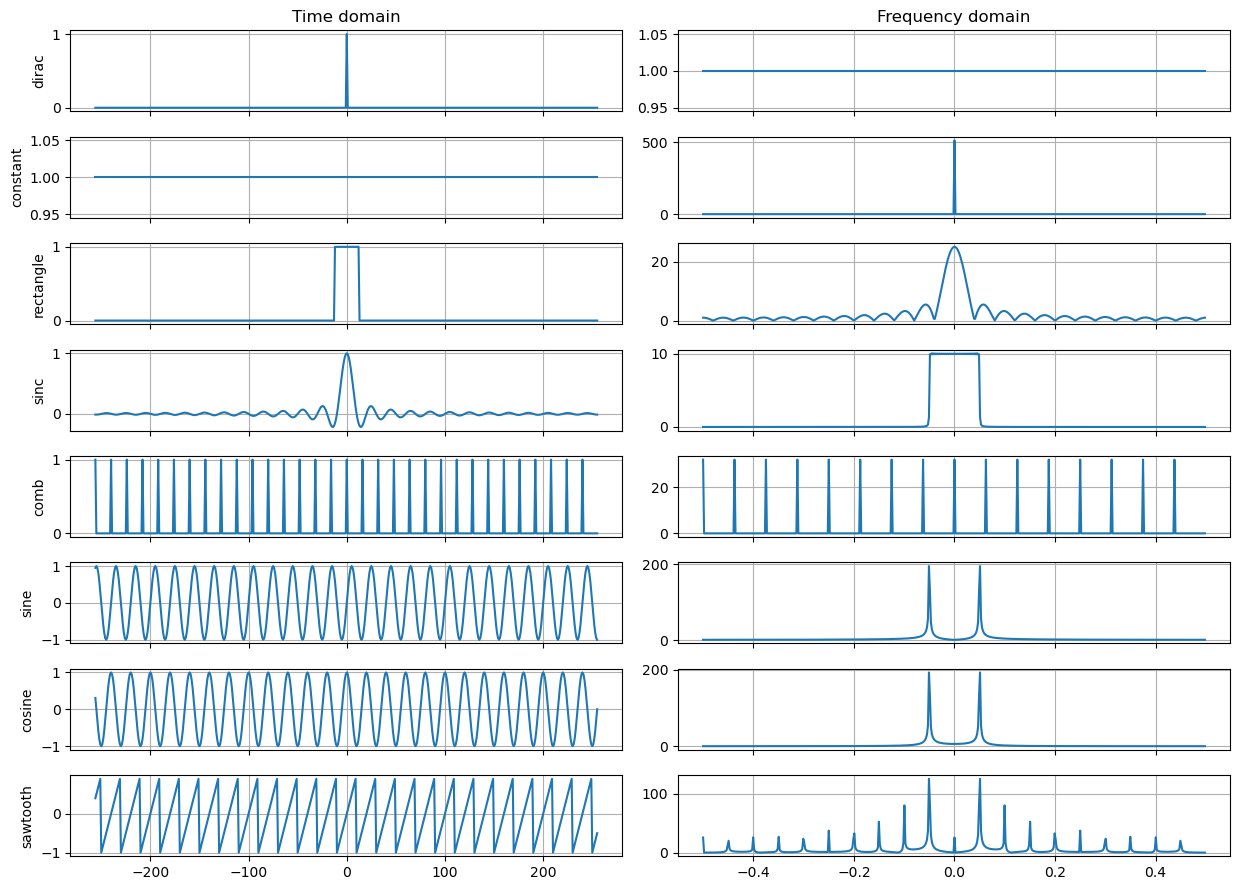

In [4]:
n_rows = 8
fig, axes = plt.subplots(n_rows, 2, figsize=(12.5, 9))
axes[0, 0].set_title('Time domain')
axes[0, 1].set_title('Frequency domain')
for row in range(n_rows-1):
    axes[row, 0].set_xticklabels([])
    axes[row, 1].set_xticklabels([])

n = 512
t = np.arange(n) - n // 2
f = np.fft.fftfreq(n) ; f = np.fft.fftshift(f)
 
def plot_row(row, x, ylabel):
    X = np.fft.fft(x) ; X = np.fft.fftshift(X)
    axes[row, 0].plot(t, x)
    axes[row, 1].plot(f, abs(X))
    axes[row, 0].set_ylabel(ylabel)

# dirac
x = np.zeros(n) ; x[n // 2] = 1
plot_row(0, x, 'dirac')

# constant
x = np.ones(n)
plot_row(1, x, 'constant')

# rectangle
x = abs(t) < n * 0.025
plot_row(2, x, 'rectangle')

# sinc
x = np.sinc(t * 0.1)
plot_row(3, x, 'sinc')

# comb
x = np.zeros(n) ; x[t % (n // 32) == 0] = 1
plot_row(4, x, 'comb')

# sine
x = np.sin(2 * np.pi * t * 0.05)
plot_row(5, x, 'sine')

# cosine
x = np.cos(2 * np.pi * t * 0.05)
plot_row(6, x, 'cosine')

# sawtooth
x = (t * 0.1 + 1) % 2 - 1
plot_row(7, x, 'sawtooth')

fig.tight_layout()
plt.show()

Some important Fourier transforms (FT) to note:
* The FT of a Dirac impulse is an infinitely-long rectangular window. Conversely, the FT of an infinitely-long rectangular window is a Dirac impulse.
    * This again is related to the **time-frequency duality**. A signal that is very narrow in time is very broad in frequency. Conversely, a signal that is very localized in frequency is very broad in time.
* The FT of a rectangular window is a sinc function (the time-domain plot is the absolute value). Conversely, the FT of a sinc function is a rectangular window.
    * In accordance with the time-frequency duality, the narrower the rectangular window in one domain, the wider the sinc function in the other domain.
* The FT of a Dirac comb is also a Dirac comb.
    * This will be useful when explaining the Nyquist-Shannon sampling theorem further below.
* The FT of the sawtooth signal shows decaying spikes equally spaced at multiples of the fundamental frequency, in accordance with the Fourier series expression introduced further above.

# Convolution theorem

The convolution theorem states that convolution in the time domain is the same as multiplication in the frequency domain. Conversely, multiplication in the time domain is the same as convolution in the frequency domain.

In the continuous case, let $x(t)$ and $y(t)$ two signals in $L^1(\mathbb{R})$. With $\mathcal{F}$ the Fourier transform operator for continuous functions, and $*$ the continuous convolution operator, we have

$$ \mathcal{F}(x*y) = \mathcal{F}(x)\mathcal{F}(y), $$
$$ \mathcal{F}(xy) = \frac{1}{2\pi}\mathcal{F}(x)*\mathcal{F}(y). $$

This means we can derive a convolution in the frequency domain, which is sometimes more efficient. Indeed, an immediate consequence is

$$ x*y = \mathcal{F}^{-1}(\mathcal{F}(x)\mathcal{F}(y)). $$

I.e. the same result can be obtained with a multiplication in the frequency domain, and back-and-forth Fourier transforms to switch between domains.

Now for discrete signals, let $x[n]$ and $y[n]$ two signals of length $N$. With $\mathcal{F}$ the DFT operator and $*$ the discrete convolution operator, we have

$$ \mathcal{F}(x*y) = \mathcal{F}(x)\mathcal{F}(y), $$
$$ \mathcal{F}(xy) = \frac{1}{N}\mathcal{F}(x)*\mathcal{F}(y). $$

Note that if $x[n]$ and $y[n]$ do not have same length, we can simply zero-pad the shorter signal until the lengths are the same, such that point-wise multiplication is possible.

In the snippet below I attempt to verify both properties.

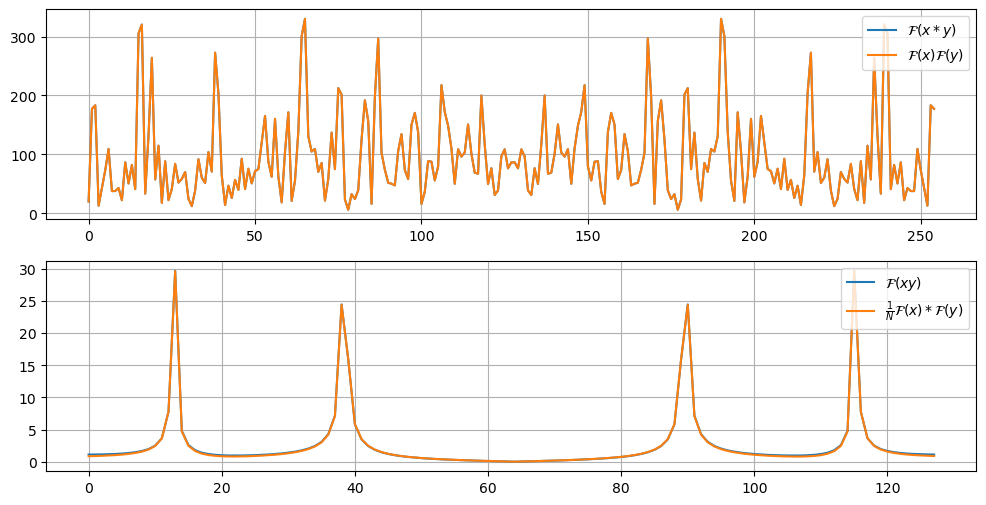

In [5]:
n = 128  # number of points

fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# first property: F(x*y)=F(x)F(y)
x = np.random.randn(n)
y = np.random.randn(n)
z = np.convolve(x, y)

X = np.fft.fft(x, n=len(z))  # forcing the FFT output to be same length as z
Y = np.fft.fft(y, n=len(z))  # forcing the FFT output to be same length as z

Z1 = np.fft.fft(z)
Z2 = X * Y

axes[0].plot(abs(Z1), label=r'$\mathcal{F}(x*y)$')
axes[0].plot(abs(Z2), label=r'$\mathcal{F}(x)\mathcal{F}(y)$')
axes[0].legend(loc='upper right')

# second property: F(xy)=F(x)*F(y)
# this one is a bit trickier as we need to flip the FFTs before convolving
# we also need to filter out all the extra frequencies resulting from the convolution in the frequency domain
x = np.sin(2 * np.pi * np.arange(n) * 0.3)  # using random noise here does not give perfect result
y = np.sin(2 * np.pi * np.arange(n) * 0.1)  # using random noise here does not give perfect result
z = x * y

X = np.fft.fft(x)
Y = np.fft.fft(y)
X = np.fft.fftshift(X)  # flip before convolving
Y = np.fft.fftshift(Y)  # flip before convolving

Z1 = np.fft.fft(z)
Z1 = np.fft.fftshift(Z1)
Z2 = np.convolve(X, Y) / n
Z2 = Z2[n // 2 : -n // 2 + 1]  # discard extra frequencies created from the convolution

axes[1].plot(abs(Z1), label=r'$\mathcal{F}(xy)$')
axes[1].plot(abs(Z2), label=r'$\frac{1}{N}\mathcal{F}(x)*\mathcal{F}(y)$')
axes[1].legend(loc='upper right')

plt.show()  # you should observe the curves overlap in both plots

# Nyquist-Shannon sampling theorem

When sampling at a frequency $f_s$, the sampling theorem says that the highest representable frequency is $\frac{f_s}{2}$. In other words, the sampling frequency should be at least twice as high as the highest frequency component of the sampled signal.

A simple example to illustrate this is the sampling of a sinusoid. Consider a sinusoid with frequency $f_0=100\ \text{Hz}$ sampled at a different frequencies $f_s$.

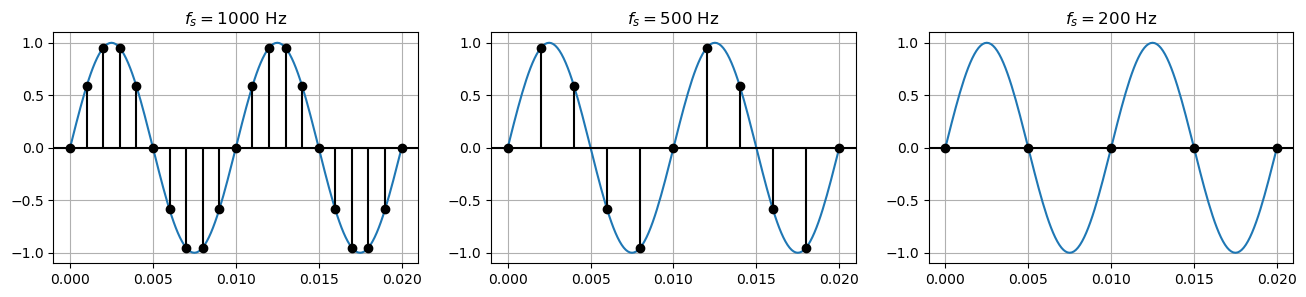

In [6]:
f0 = 100  # sinusoid frequency
T = 2e-2  # sinusoid duration in seconds

# first create a sinusoid with a fine time step; this will represent the continuous signal
fs_hi = 8e3  # high sampling frequency
t_cont = np.arange(0, T + 1 / fs_hi, 1 / fs_hi)  # fine time vector with time step 1/fs
x_cont = np.sin(2 * np.pi * f0 * t_cont)  # this represents the continuous signal

fig, axes = plt.subplots(1, 3, figsize=(16, 3))

# now let's create a coarse digital signals for different low sampling frequencies
for ax, fs_lo in zip(axes, [1000, 500, 200]):
    ax.plot(t_cont, x_cont)
    t_coarse = np.arange(0, T + 1 / fs_lo, 1 / fs_lo)
    x_coarse = np.sin(2 * np.pi * f0 * t_coarse)
    ax.stem(t_coarse, x_coarse, 'k', markerfmt='ko', basefmt=' ')
    ax.axhline(0, color='k')
    ax.set_title(f'$f_s={fs_lo}$ Hz')

plt.show()

If $f_s$ is below $2f_0=200\ \text{Hz}$, it becomes impossible to reconstruct the continuous signal from the digital signal. For example, let $f_s=180\ \text{Hz}$ and two sinusoids, one at $f_0=100\ \text{Hz}$ and $f_1=80\ \text{Hz}$.

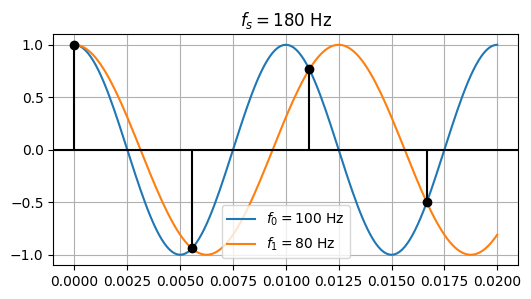

In [18]:
fig, ax = plt.subplots(figsize=(6, 3))

f0 = 100
f1 = 80

x_cont = np.cos(2 * np.pi * f0 * t_cont)
ax.plot(t_cont, x_cont, label=f'$f_0={f0}$ Hz')

x_cont = np.cos(2 * np.pi * f1 * t_cont)
ax.plot(t_cont, x_cont, label=f'$f_1={f1}$ Hz')

fs_lo = 180
t_coarse = np.arange(0, T, 1 / fs_lo)
x_coarse = np.cos(2 * np.pi * f0 * t_coarse)
ax.stem(t_coarse, x_coarse, 'k', markerfmt='ko', basefmt=' ')
ax.axhline(0, color='k')

ax.set_title(f'$f_s={fs_lo}$ Hz')
ax.legend()

plt.show()

Both signals produce the exact same samples. It is therefore impossible to know from the samples if the signal is a sinusoid at 80 Hz or 100 Hz.

This can be explained for any signal using the convolution theorem and the Dirac comb function. Remember we saw that sampling is the same as multiplying the signal with the Dirac comb,

$$
\forall t \in \mathbb{R}, \quad (\text{III}_{T_s} x)(t) = \left\{
\begin{aligned}
&x(n{T_s}) &&\text{if}\ \exists n \in \mathbb{Z}\ \text{such that}\ t=n{T_s},\\
&0 &&\text{else},
\end{aligned}\right.
$$

where $T_s=\frac{1}{f_s}$ is the sampling period. The convolution theorem states the Fourier transform of a product is the convolution of the Fourier transforms in the frequency domain:

$$\mathcal{F}(\text{III}_{T_s} x) = \mathcal{F}(\text{III}_{T_s})*\mathcal{F}(x) = \mathcal{F}(\text{III}_{T_s})*X$$

Now it can be shown that the Fourier transform of a Dirac comb is also a Dirac comb (you can try to prove it as an exercise) with period $\omega_s=2\pi f_s$,

$$\forall\omega\in\mathbb{R},\quad\mathcal{F}(\text{III}_{T_s})(\omega)=\text{III}_{\omega_s}(\omega)=\omega_s\sum_{k=-\infty}^{+\infty}\delta(\omega-\omega_s)$$

Therefore, sampling in the time domain is the same as convolving with a Dirac comb in the frequency domain. And convolving with a Dirac comb is the same as replicating the signal infinitely, with replicas evenly spaced by $\omega_s$.

The image below illustrates this. $X_a(\omega)$ is an example spectrum of the original continuous signal $x(t)$, while $X_\delta(\omega)$ is the spectrum of the sampled signal $(\text{III}_{T_s}x)(t)$. Since $x(t)$ is real-valued, $X_a(\omega)$ is symmetric around $\omega=0$. The spectrum is replicated infinitely along the frequency axis, with copies evenly spaced by $\omega_s$. The highest frequency component of the original signal is $\omega_{\max}$.

![nyquist](pics/nyquist.png)

If $\omega_{\max}>\frac{\omega_s}{2}$, the replicas would overlap. I.e. the frequency components above $\frac{\omega_s}{2}$ would get mirrored and mixed-up with lower frequencies. This is called **aliasing**. The highest representable frequency, i.e. $\frac{\omega_s}{2}$ in rad/s or $\frac{f_s}{2}$ in Hz, is called the **Nyquist frequency**. The signal frequency content should be below the Nyquist frequency, else the signal is undersampled and aliasing occurs.

![aliasing](pics/aliasing.png)

# Short-time Fourier transform

We wish to perform the spectral analysis of a short audio recording of 1 second. At 44.1 kHz, this recording would consist of 44100 samples. One option is to perform the 44100-point FFT of the entire signal, and get a spectrum with 44100 frequency bins.

This not very efficient (the FFT complexity is $O(N\log N)$ at best and $O(N^2)$ at worst), and we rarely need such a fine description of the signal in the frequency domain. Note this is a 1 second-long signal only!

A better option is to segment the signal in the time domain and perform the FFT of each segment. This is called a Short-time Fourier transform (STFT). The output is a representation of the signal that is both a function of time (frame index) and frequency.

The STFT of $x[n]$ is denoted $X[k,l]$ and can be formally defined as

$$ X[k, l] = \sum_{n=0}^{M-1}\tilde{x}[n + kH]e^{-i2\pi\frac{kn}{M}}, $$

where

$$\tilde{x}[n+kH]=\left\{\begin{aligned}&x[n + kH]w[n]&&\text{if}\ n\in\{0,1,...,N-1\},\\&0&&\text{if}\ n\in\{N,N+1,...,M\},\end{aligned}\right.$$

and
* $k$ is the frequency bin index $\in \{0, 1, ..., M-1\}$
* $l$ is the frame index
* $N$ is the frame length — the number of signal samples in each segment
* $H$ is the hop length — the number of signal samples between adjacent segments
    * Sometimes the overlap length $O$ is specified instead: $O=N-R$
* $w$ is the analysis window function of length $N$ — commonly used to reduce spectral leakage
    * Spectral leakage is not covered in this notebook but you can refer to [Oppenheim, Schafer and Buck](#References), Chapter 10
* $M$ is the number of points after zero-padding the windows — the number of FFT points

The STFT is implemented in `scipy` under `scipy.signal.stft`,
* the `nperseg` argument corresponds to $N$
* the `noverlap` argument corresponds to $O$
* the `nfft` argument corresponds to $M$
* the `window` argument corresponds to $w$

The function also takes as arguments the sampling frequency `fs` to return the corresponding time and frequency vectors.

In the example below I generate a sinusoid whose frequency is modulated by another sinusoid. The FFT of the entire signal shows high values across the entire range of swept frequencies, while the STFT allows to observe how the frequency changes over time.

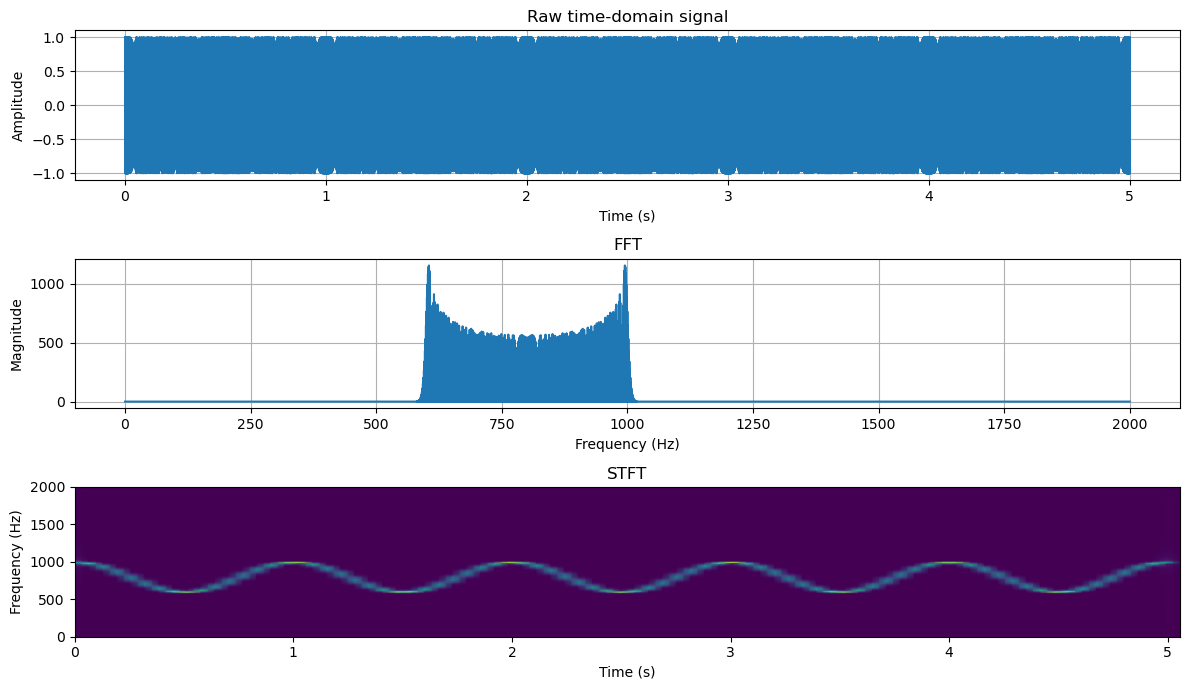

In [7]:
from scipy.signal import stft

fs = 4e3  # sampling frequency
f_mod = 1  # modulation frequency
f_delta = 200  # modulation depth
f0 = 800  # carrier frequency
T = 5  # signal duration
t = np.arange(0, T, 1 / fs)  # time vector
x = np.sin(2 * np.pi * t * f0 + f_delta / f_mod * np.sin(2 * np.pi * t * f_mod))

fig, axes = plt.subplots(3, 1, figsize=(12, 7))

axes[0].plot(t, x)
axes[0].set_title('Raw time-domain signal')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')

X = np.fft.rfft(x)
f = np.fft.rfftfreq(len(x), 1 / fs)

axes[1].plot(f, abs(X))
axes[1].set_title('FFT')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Magnitude')

f, t, S = stft(x, fs, nperseg=512)

axes[2].grid(False)
axes[2].pcolormesh(t, f, abs(S), shading='gouraud')
axes[2].set_title('STFT')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Frequency (Hz)')

fig.tight_layout()
plt.show()

FAQ:
* *What if I still want to have a representation of my signal that depends only on frequency? E.g. if I am interested in the average energy in each frequency bin?*
    * You can use the STFT and average the energy across frames. This is the long-term average spectrum (LTAS).

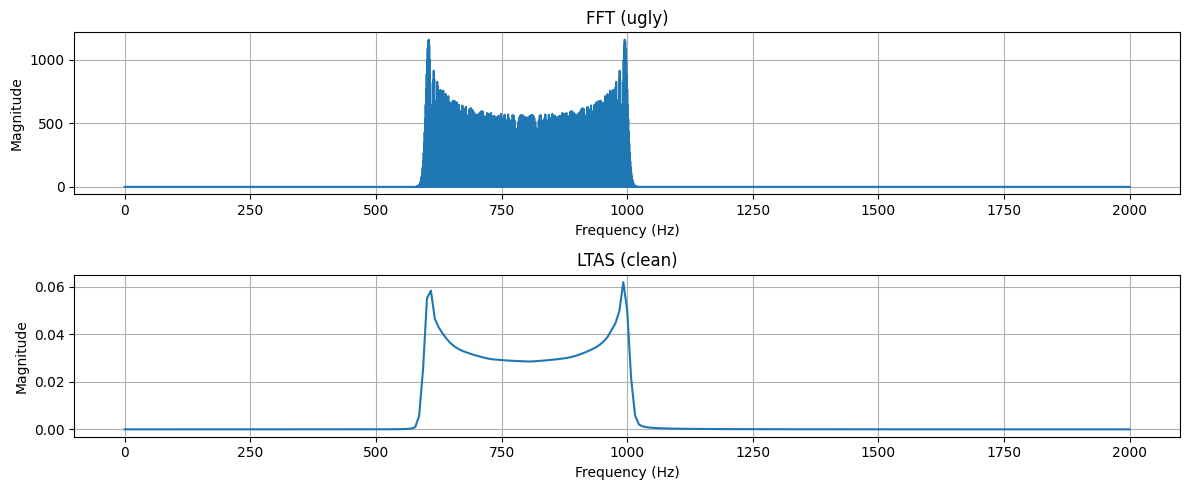

In [20]:
from scipy.signal import stft

fig, axes = plt.subplots(2, 1, figsize=(12, 5))

X = np.fft.rfft(x)
f = np.fft.rfftfreq(len(x), 1 / fs)

axes[0].plot(f, abs(X))
axes[0].set_title('FFT (ugly)')
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Magnitude')

f, t, S = stft(x, fs, nperseg=512)
ltas = np.mean(abs(S), axis=1)

axes[1].plot(f, ltas)
axes[1].set_title('LTAS (clean)')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Magnitude')

fig.tight_layout()
plt.show()

* *But the magnitude (y-axis) does not match!*
    * There are different ways of normalizing the FFT and the STFT. Here the STFT implementation of `scipy` applies a normalization whereas `np.fft.fft` does not. Windowing also has a influence. But this does not matter so much, provided you use the same method across signals.
* *How do I chose the length of the frame/window (`nperseg` argument)?*
    * This is for you to decide. A shorter frame size will give you a better time resolution, but a worse frequency resolution. Conversely a longer frame gives a worse time resolution, but a better frequency resolution. This is again the **time-frequency duality**. However the FFT is the fastest for signal lengths equal to a power of 2. So common frame sizes for audio analysis are e.g. 256, 512, 1024, 2048 or 4096, depending on the sampling rate. For other applications with different sampling rates, frame sizes must be adapted accordingly.

# Filters

A filter is a broad term for a system which takes a signal as an input and outputs a new signal.

Filters can be analog for continuous signals (electronics circuits consisting of capacitors and coils in e.g. guitar amps or speaker crossover filters), or digital for discrete signals (integrated circuits). In this notebook we only cover digital filters.

In DSP, common filters are linear time-invariant (LTI) systems. Consider two digital signals $x[n]$ and $y[n]$ (note that $x[n]$ refers to the function $x$ of the discrete dependent variable $n$, and not the value taken by $x$ on a fixed $n$). A filter $\mathcal{H}$ is an LTI system if it verifies the following properties:
* Linearity: $\forall\alpha,\beta\in\mathbb{R},\ \mathcal{H}(\alpha x[n]+\beta y[n])=\alpha\mathcal{H}(x[n])+\beta\mathcal{H}(y[n])$
    * Can also be written as follows: $\forall\alpha,\beta\in\mathbb{R},\ \mathcal{H}(\alpha x+\beta y)=\alpha\mathcal{H}(x)+\beta\mathcal{H}(y)$
* Time-invariance: $\forall m\in\mathbb{Z},\ \mathcal{H}(x[n-m])=\mathcal{H}(x)[n-m]$
    * Can also be written as follows: $\forall m\in\mathbb{Z},\ \mathcal{H}(n\mapsto x[n-m])=n\mapsto\mathcal{H}(x)[n-m]$
    * In other words, LTI systems do not change over time; if the input is delayed, the output is also delayed by the same amount.

In the following, $x[n]$ denotes the input of the filter, while $y[n]$ denotes the output of the filter.

![filter](pics/filter.png)

## Impulse response

A filter can be described by its **impulse response**. The impulse response is, as the name suggests, the output of the filter when presented a Dirac impulse $\delta[n]$,

$$ h[n] = \mathcal{H}(\delta[n]). $$

The reason why $h[n]$ fully describes the system follows. Since $\delta[n]$ is the identity element for the convolution, we have

$$
\begin{aligned}
y[n] &= \mathcal{H}(x[n]) \\
&= \mathcal{H}(x[n]*\delta[n]) && \delta\ \text{is the identity element}\\
&= \mathcal{H}\big(\sum_{m=-\infty}^{+\infty}x[m]\delta[n-m])\big)\\
&= \sum_{m=-\infty}^{+\infty}x[m]\mathcal{H}\big(\delta[n-m])\big) && \mathcal{H}\ \text{is linear}\\
&= \sum_{m=-\infty}^{+\infty}x[m]h[n-m] && \mathcal{H}\ \text{is time-invariant}\\
&= x[n]*h[n].
\end{aligned}
$$

Therefore if we know $h[n]$, we can derive the output $y[n]$ from the filter given an arbitrary input $x[n]$ by calculating the convolution of $x[n]$ with $h[n]$.

## Difference equation

A digital filter can also be charaterized by its difference equation,

$$ \sum_{m=0}^{N}a_my[n-m] = \sum_{m=0}^{M}b_mx[n-m], $$

or, with the output $y[n]$ isolated on the left side, and assuming $a_0=1$,

$$ y[n] = -\sum_{m=1}^{N}a_my[n-m] + \sum_{m=0}^{M}b_mx[n-m]. $$

* The $a_m$ are the **feedback coefficients** (similar to autoregressive coefficients in time series analysis)
* The $b_m$ are the **feedforward coefficients** (similar to moving-average coefficients in time series analysis)
* The **filter order** is $\max(M, N)$

Note that we usually force $a_0=1$. If this is not the case, we can simply divide all the coefficients by $a_0$ without changing the behavior of the filter.

**Examples:**

* L-point moving average filter:

$$ y[n] = \frac{1}{L}(x[n]+x[n-1]+...+x[n-L+1]). $$

  Here $a_0=1$ and $b_m=\frac{1}{L}$ for $m\in\{0, 1, ..., L-1\}$. The filter order is $L-1$.

* Exponential smoothing with factor $0<\alpha<1$:

$$ y[n] = \alpha y[n-1] + (1-\alpha)x[n]. $$

  Here $a_0=1$, $a_1=-\alpha$ and $b_0=1-\alpha$. The filter order is 1.

## Finite impulse response (FIR) filter

If there are no feedback coefficients (except $a_0$), then the filter is an **FIR filter**,

$$ y[n] = \sum_{m=0}^{M}b_mx[n-m]. $$

FIR filters are very **stable**, but computationally more **expensive**.

The impulse response of an FIR filter $\mathcal{H}$ is

$$
\begin{aligned}
h[n] &= \mathcal{H}(\delta[n]) \\
&= \sum_{m=0}^{M}b_m\delta[n-m] \\
&= b_n.
\end{aligned}$$

Therefore the impulse response of an FIR filter is simply the sequence of feedforward coefficients: $h[n]=[b_0, b_1,...,b_M]$.

**Example**: The L-point moving average filter is an FIR filter. Its impulse response is $h[n]=[\frac{1}{L}, \frac{1}{L}, ..., \frac{1}{L}]$.

## Infinite impulse response (IIR) filter

If there is at least one feedback coefficient (other than $a_0$), then the filter is an **IIR filter**,

$$ y[n] = -\sum_{m=1}^{N}a_my[n-m] + \sum_{m=0}^{M}b_mx[n-m]. $$

IIR filters can be **unstable**, but are computationally much **cheaper** (FIR filters require more taps compared to IIR filters to acheive the same frequency response).

The impulse response of an IIR cannot be evaluated; it is infinite.

**Example**: The exponential smoothing filter is an IIR filter,

$$ y[n] = \alpha y[n-1] + (1-\alpha)x[n]. $$

Attempting to write the impulse response would look like this,

$$
\begin{aligned}
h[n] &= \mathcal{H}(\delta[n]) \\
&= \alpha\mathcal{H}(\delta[n-1]) + (1-\alpha)\delta[n] \\
&= \alpha^2\mathcal{H}(\delta[n-2]) + \alpha(1-\alpha)\delta[n-1] + (1-\alpha)\delta[n] \\
&= \alpha^3\mathcal{H}(\delta[n-3]) + \alpha^2(1-\alpha)\delta[n-2] + \alpha(1-\alpha)\delta[n-1] + (1-\alpha)\delta[n] \\
&=\ ...
\end{aligned}$$

Moreover if $\alpha>1$, the output would explode; the filter is unstable.

**Example**:

Digital filtering is implemented under `scipy.signal.lfilter`. The function takes as arguments the sequence of feedforward coefficients, the sequence of feedback coefficients and the input signal. Note the first feedforward coefficient, i.e. $a_0$, must be 1.

Below I filter a noisy signal with a moving average filter and an exponential smoothing filter using `scipy.signal.lfilter`.

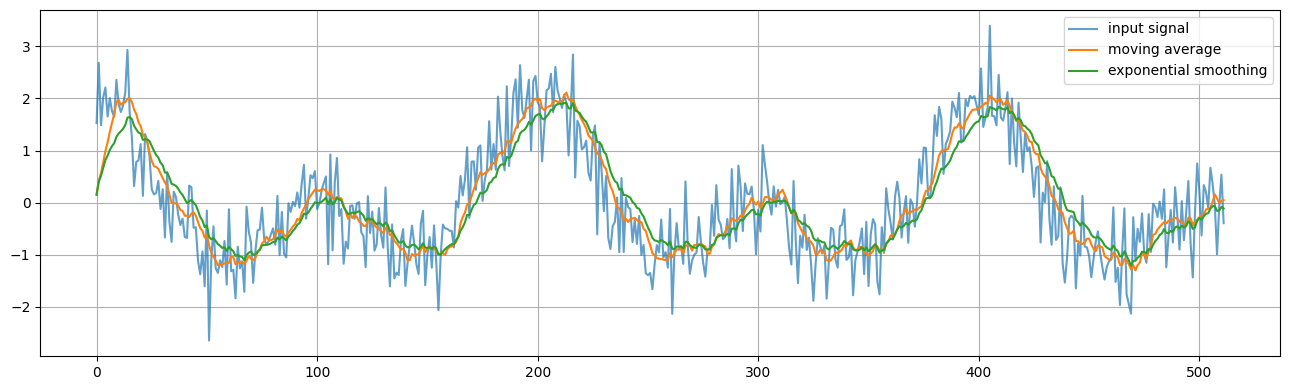

In [21]:
from scipy.signal import lfilter

# an arbitrary noisy input signal
n = 512  # signal length
x = 0.5 * np.random.randn(n) + np.cos(2 * np.pi * np.arange(n) * 0.01) + np.cos(2 * np.pi * np.arange(n) * 0.005)

# moving average filter
L = 10  # number of points to average
b = np.ones(L) / L  # feedforward coefficients
a = [1]  # feedback coefficients
y1 = lfilter(b, a, x)

# exponential smoothing filter
alpha = 0.9
b = [1-alpha]  # feedforward coefficients
a = [1, -alpha]  # feedback coefficients
y2 = lfilter(b, a, x)

fig, ax = plt.subplots(figsize=(13, 4))
ax.plot(x, label='input signal', alpha=0.7)
ax.plot(y1, label='moving average')
ax.plot(y2, label='exponential smoothing')
ax.legend()
fig.tight_layout()
plt.show()

## Filter frequency response

We saw that a filter can be characterized with the impulse response; filtering is the same as convolving with the impulse response of the filter. The convolution theorem tells us that a convolution in the time domain is the same as a multiplication in the frequency domain. Therefore, we can perform a time-domain filtering operation in the frequency domain, by multiplying the Fourier transform of the input signal with the Fourier transform of the impulse response,

$$ y[n]=h[n]*x[n]\quad\xrightarrow{\quad\text{DTFT}\quad}\quad Y(\omega)=H(\omega)X(\omega) $$

$H(\omega)$ is the frequency response of the filter. It is yet another description of the filter, this time in the frequency domain. It describes how each frequency component is modified in magnitude and phase.

Another way to look at it is as follows. Consider a fixed $\omega\in\mathbb{R}$, and $x[n]=e^{i\omega n}$. That is, $x[n]$ is a digital signal consisting of a single pure tone (single complex exponential, single component) at frequency $\omega$. The output of the filter is then

$$
\begin{aligned}
y[n] &= h[n]*x[n] \\
&= \sum_{m=-\infty}^{\infty}h[m]x[n-m] \\
&= \sum_{m=-\infty}^{\infty}h[m]e^{i\omega(n-m)} \\
&= e^{i\omega n}\sum_{m=-\infty}^{\infty}h[m]e^{-i\omega m} \\
&= e^{i\omega n}\ \text{DTFT}(h[n]) \\
&= e^{i\omega n}H(\omega) \\
&= x[n]H(\omega) \\
\end{aligned}
$$

**Note**: Here $H(\omega)$ refers to the value taken by $H$ on the fixed $\omega$, and not the function $H$ of the dependent variable $\omega$. $x[n]$ is still referring to the function $x$.

As seen, the pure tone $x[n]$ is simply multiplied by $H(\omega)$. Since $H(\omega)$ is complex, $x[n]$ is transformed both in magnitude and phase. In other words, the output is also a pure tone at the same frequency, only scaled and shifted along the frequency axis. If we now instead consider an arbitrary input and think of it as an infinite sum of complex exponentials at different frequencies, and we remember filters are linear systems, then the output is simply the sum of all the components individually scaled and shifted according to the function $H(\omega)$. Which is why a description like $H(\omega)$ is so powerful.

* *But what if the filter is an IIR filter? For an FIR filter, $H(\omega)$ can be obtained by calculating the DTFT of the impulse response, which is simply the sequence of feedforward coefficients. But for an IIR, the impulse response is infinite!*

We can still define the frequency response as follows. We saw above that if $x[n]=e^{i\omega n}$, then $y[n]=e^{i\omega n}H(\omega)$. Thus, starting from the difference equation,

$$
\begin{aligned}
&& &\sum_{m=0}^{N}a_my[n-m] = \sum_{m=0}^{M}b_mx[n-m] \\
&&\implies &\sum_{m=0}^{N}a_me^{i\omega (n-m)}H(\omega) = \sum_{m=0}^{M}b_me^{i\omega (n-m)} \\
&&\implies &H(\omega)e^{i\omega n}\sum_{m=0}^{N}a_me^{-i\omega m} = e^{i\omega n}\sum_{m=0}^{M}b_me^{-i\omega m} \\
&&\implies &H(\omega)=\frac{\sum_{m=0}^{M}b_me^{-i\omega m}}{\sum_{m=0}^{N}a_me^{-i\omega m}} \\
\end{aligned}
$$

Note that if there are no feedback coefficients except $a_0=1$ (case of an FIR filter), then only the numerator remains, and we correctly obtain the DTFT of the sequence of feedforward coefficients (assuming $b_m=0$ for $m \notin \{0,1,...,M\}$ so the sum extends to infinity).

**Example**:

A filter frequency response can be calculated using `scipy.signal.freqz`. The function takes as arguments the sequence of feedforward coefficients and the sequence of feedback coefficients. It can also take the number of evenly spaced frequency points `worN` at which the frequency response is calculated. The function outputs a frequency vector and the complex frequency response. Note the frequency vector ranges from 0 to $\pi$, so you have to scale it so that it ranges from $0$ to $\frac{f_s}{2}$, depending on the sampling frequency $f_s$ you are working with. You can also provide the `fs` argument to `scipy.signal.freqz` and the frequency vector output will be correctly scaled.

Let's calculate the frequency responses of the moving average and the exponential smoothing filters.

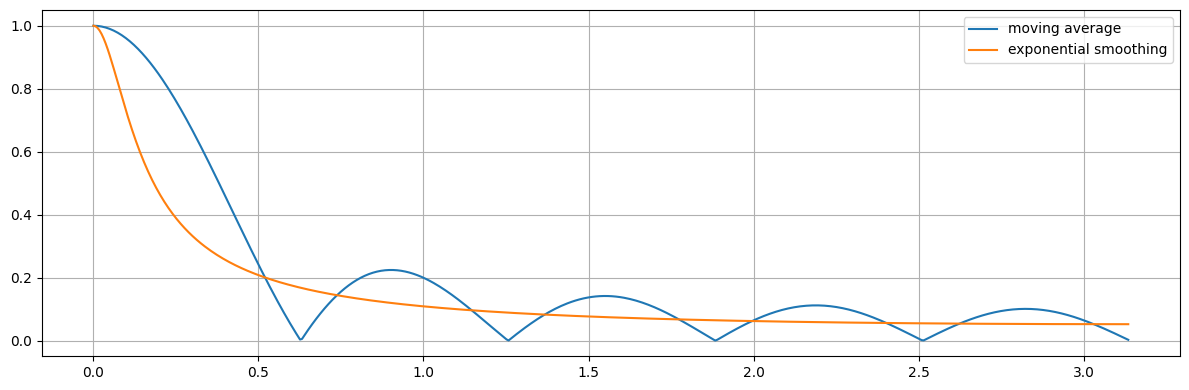

In [22]:
from scipy.signal import freqz

# moving average filter
L = 10  # number of points to average
b = np.ones(L) / L  # feedforward coefficients
a = [1]  # feedback coefficients
w1, h1 = freqz(b, a)

# exponential smoothing filter
alpha = 0.9
b = [1-alpha]  # feedforward coefficients
a = [1, -alpha]  # feedback coefficients
w2, h2 = freqz(b, a)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(w1, abs(h1), label='moving average')
ax.plot(w2, abs(h2), label='exponential smoothing')
ax.legend()
fig.tight_layout()
plt.show()

It can be seen that both filters act as low-pass filters. They present a high gain at low frequencies, and the gain decreases as the frequency increases. This means the filters attenuate high frequencies, while they let low frequencies pass through. This makes sense, since the filters smooth out the fast and noisy fluctuations, which are the high frequencies.

FAQ:
* Can I use `np.fft.fft` instead of `scipy.signal.freqz` to plot the frequency response?
    * You can technically obtain the same result with `np.fft.fft` if you discard the negative frequencies and if you provide the right number of FFT points `n`. But I recommend using `scipy.signal.freqz` instead, since it is specifically meant for filters; it takes coefficients `b` and `a` as arguments and outputs a one-sided, well-defined frequency response. Using `scipy.signal.freqz` for a filter shows you understand what you are doing.
* Can I use `scipy.signal.freqz` to plot a signal spectrum?
    * No! A signal presents a **spectrum** (not a frequency response), while a filter is a system that has input/output signals and thus presents a **frequency response** (not a spectrum). Filter $\sim$ frequency response, signal $\sim$ spectrum. If you use `scipy.signal.freqz` to plot the frequency content of a signal, then the signal would be cropped internally and only the first `worN` samples would be analyzed. For signal spectrums, please use `scipy.signal.stft` and average the energy across time-frames (see LTAS earlier).

# Postface

Other important DSP subjects not covered in this notebook include:
* window functions
* spectral leakage
* filter design
* biquad filters
* Z-transform
* power spectral density

If you find typos, I would greatly appreciate it if you reported them ❤️.

# References

* Alan V. Oppenheim, Ronald W. Schafer and John R. Buck. *Discrete-time signal processing* (2nd ed.). Prentice Hall, 1999.
* John G. Proakis and Dimitris G. Manolakis. *Introduction to Digital Signal Processing : Principles, Algorithms and Applications* (4th ed.). Pearson Prentice Hall, 2007.

# Image credits

* [Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples.](https://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/index.ipynb)
* Lecture notes on [22001 Acoustic signal processing](https://kurser.dtu.dk/course/22001) by Tobias May at the Technical University of Denmark